In [1]:
import numpy as np
import matplotlib.pyplot as plt

def apply_transformation(points, matrix):
    points = np.array(points)
    points_h = np.c_[points, np.ones(len(points))]
    transformed_points_h = np.dot(points_h, matrix.T)
    return transformed_points_h[:, :2]

In [2]:
def plot_2d_object(points, title="2D Object"):
    plt.figure(figsize=(6, 6))
    plt.plot(*zip(*points, points[0]), marker='o')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.show()

In [3]:
def translate(points, tx, ty):
    transformation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

In [4]:
def scale(points, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0],
                                       [0, sy, 0],
                                       [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

In [5]:
def rotate(points, angle):
    rad = np.radians(angle)
    transformation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                       [np.sin(rad), np.cos(rad), 0],
                                       [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

In [6]:

def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0],
                                           [0, -1, 0],
                                           [0, 0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0, 1, 0],
                                           [0, 0, 1]])
    else:
        raise ValueError("Axis should be 'x' or 'y'")
    return apply_transformation(points, transformation_matrix)

In [7]:
def shear(points, shx, shy):
    transformation_matrix = np.array([[1, shx, 0],
                                       [shy, 1, 0],
                                       [0, 0, 1]])
    return apply_transformation(points, transformation_matrix)

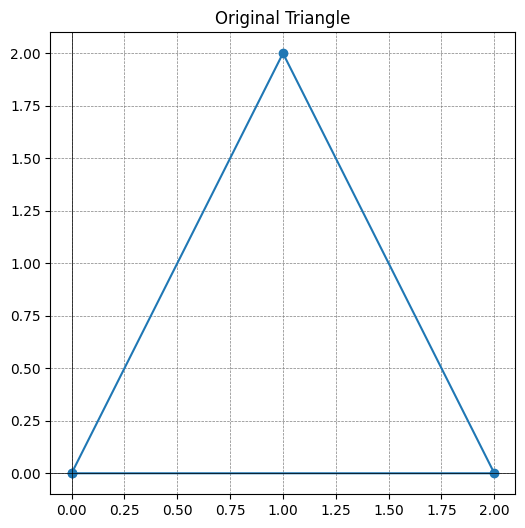

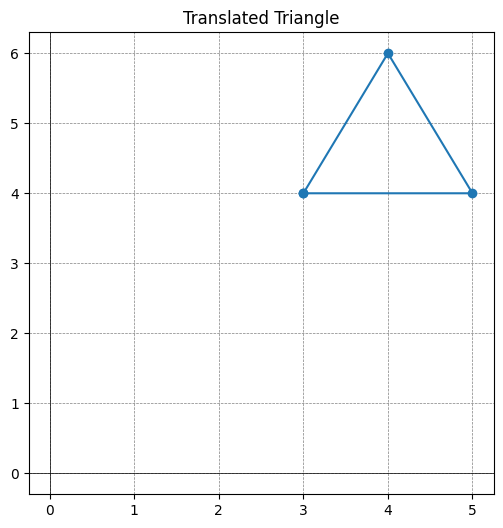

In [8]:
triangle = [(0, 0), (2, 0), (1, 2)]

plot_2d_object(triangle, "Original Triangle")
triangle_translated = translate(triangle, 3, 4)
plot_2d_object(triangle_translated, "Translated Triangle")



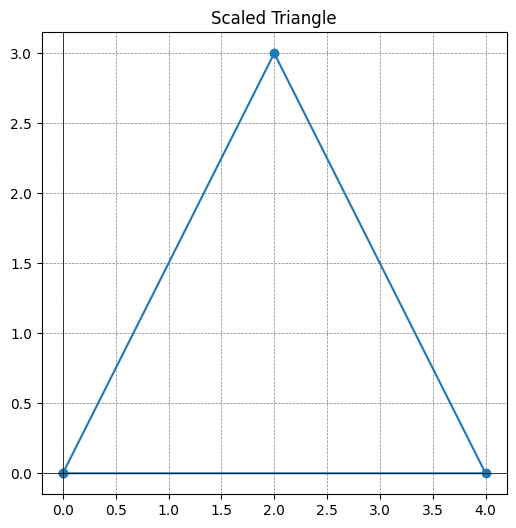

In [9]:
triangle_scaled = scale(triangle, 2, 1.5)
plot_2d_object(triangle_scaled, "Scaled Triangle")



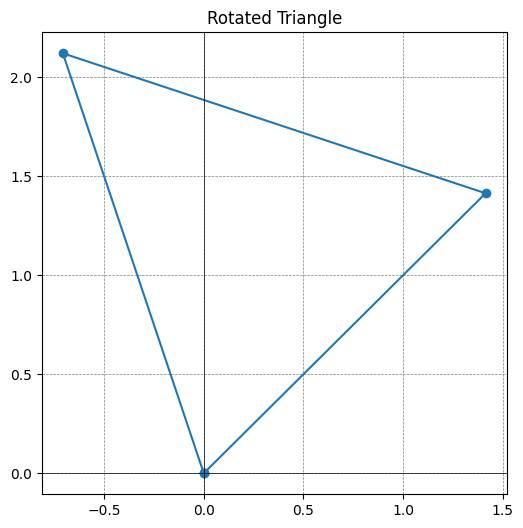

In [10]:
triangle_rotated = rotate(triangle, 45)
plot_2d_object(triangle_rotated, "Rotated Triangle")



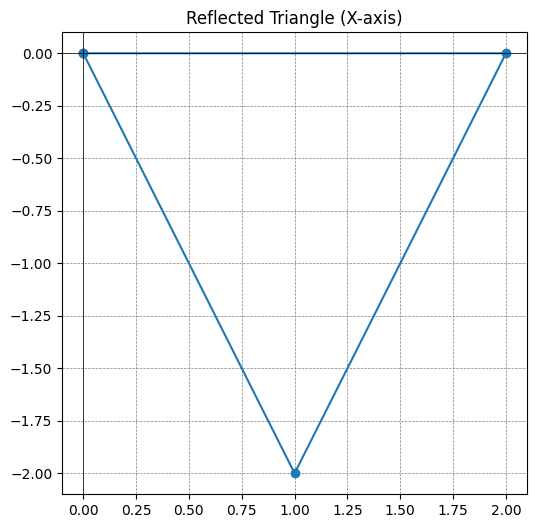

In [11]:
triangle_reflected = reflect(triangle, 'x')
plot_2d_object(triangle_reflected, "Reflected Triangle (X-axis)")



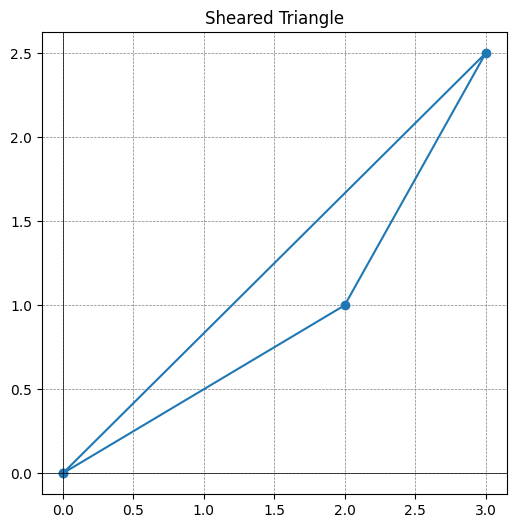

In [12]:
triangle_sheared = shear(triangle, 1, 0.5)
plot_2d_object(triangle_sheared, "Sheared Triangle")

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/content/car.jpeg")


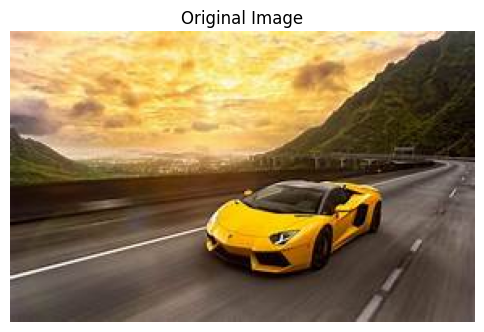

In [14]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()
display_image(image, "Original Image")


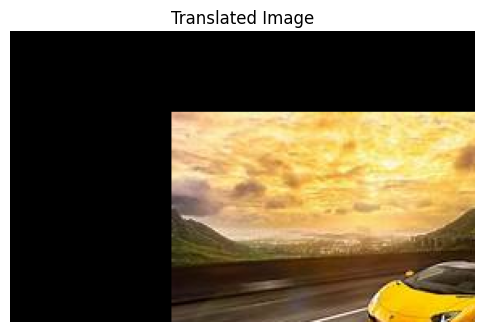

In [15]:
# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 100, 50)
display_image(translated_image, "Translated Image")

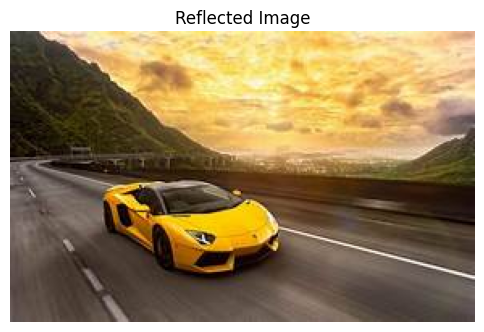

In [16]:
# 2. Reflection
reflected_image = cv2.flip(image, 1)  # Horizontal flip
display_image(reflected_image, "Reflected Image")

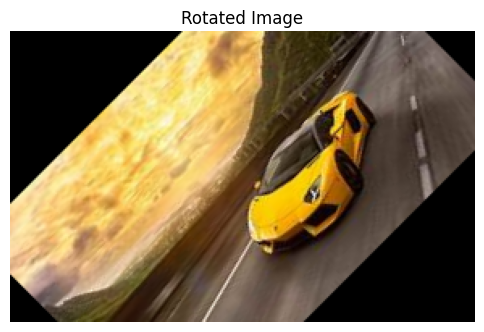

In [17]:
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image")

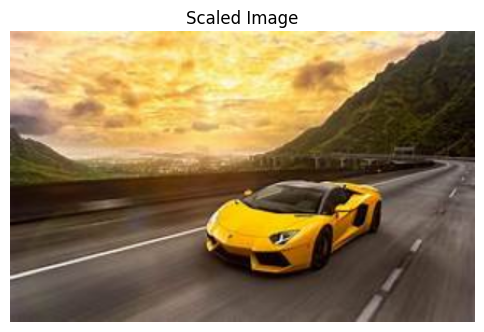

In [18]:
# 4. Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image(scaled_image, "Scaled Image")

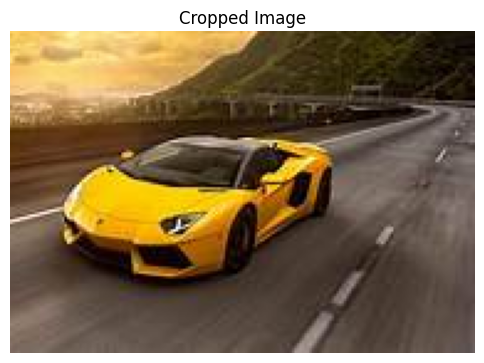

In [19]:
# 5. Cropping
cropped_image = image[50:200, 100:300]  # Cropping coordinates
display_image(cropped_image, "Cropped Image")

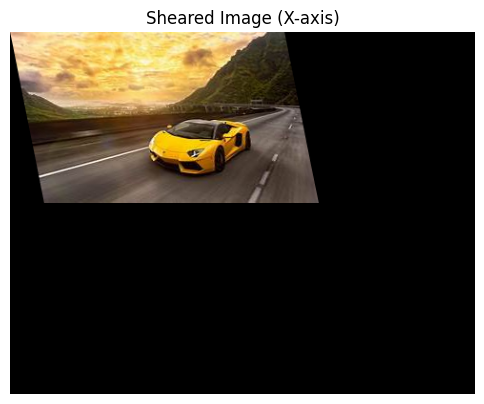

In [20]:
# 6. Shearing (X-axis)
def shear_image(image, shx, shy):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + 200, rows + 200))
    return sheared_image

sheared_image_x = shear_image(image, 0.2, 0)
display_image(sheared_image_x, "Sheared Image (X-axis)")

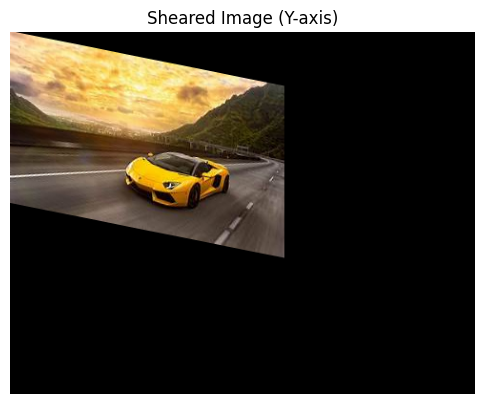

In [21]:
# 7. Shearing (Y-axis)
sheared_image_y = shear_image(image, 0, 0.2)
display_image(sheared_image_y, "Sheared Image (Y-axis)")